 # Checkpoint_Titanic Survival Prediction using Decision Tree and  Random Forests _ by SERRAI Sihem Chourouk 

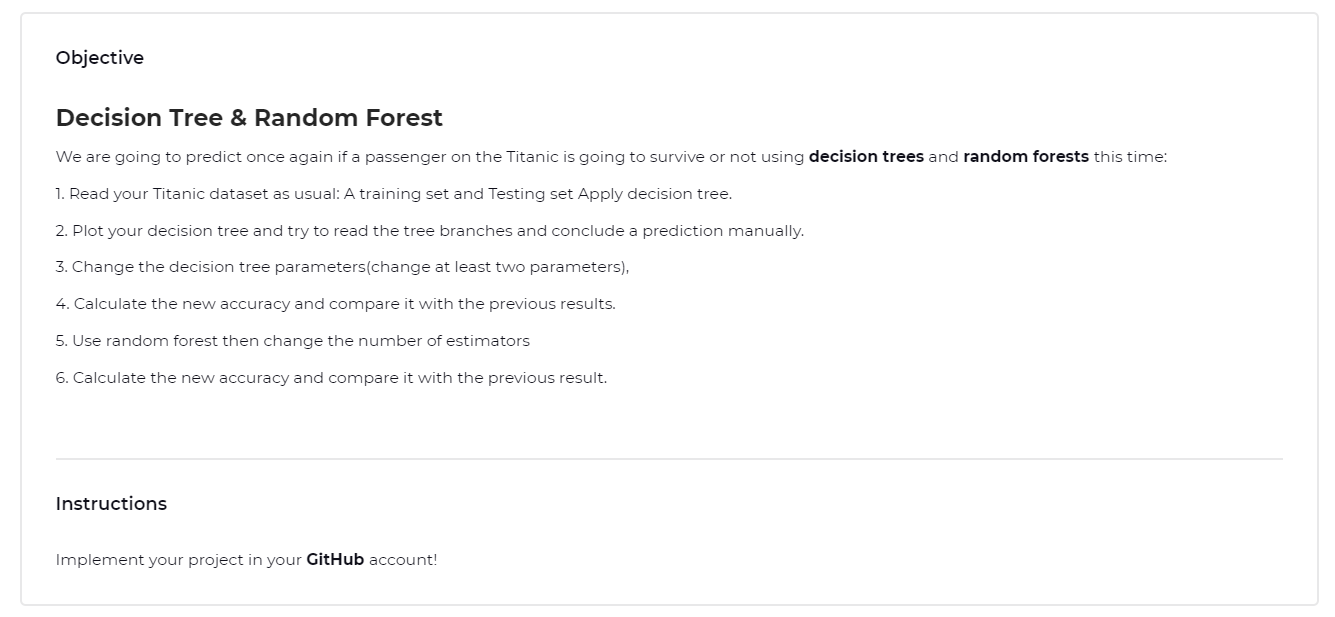

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
TITANIC_file = "titanic-passengers"
TITANIC_data = pd.read_csv("titanic-passengers.csv", sep=';')
TITANIC_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [3]:
TITANIC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


## TITANIC_DATA PREPROCESSING AND DATA VIZ

## First, Who were on TITANIC  ?


In [4]:
TITANIC_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


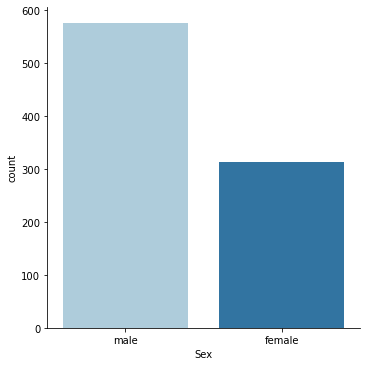

In [6]:
sns.factorplot('Sex',data=TITANIC_data,kind="count", palette="Paired")

In [5]:
TITANIC_data.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


## Distribution of males and females based on Pclass and place of embarkment

In [6]:
TITANIC_data.groupby(['Pclass','Sex','Embarked']).size()

Pclass  Sex     Embarked
1       female  C            43
                Q             1
                S            48
        male    C            42
                Q             1
                S            79
2       female  C             7
                Q             2
                S            67
        male    C            10
                Q             1
                S            97
3       female  C            23
                Q            33
                S            88
        male    C            43
                Q            39
                S           265
dtype: int64

In [7]:
TITANIC_data.groupby(['Pclass','Sex']).size()
print 
sex_age_titanic = pd.crosstab(index=[TITANIC_data['Pclass']], columns=[TITANIC_data['Sex']])
sex_age_titanic

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


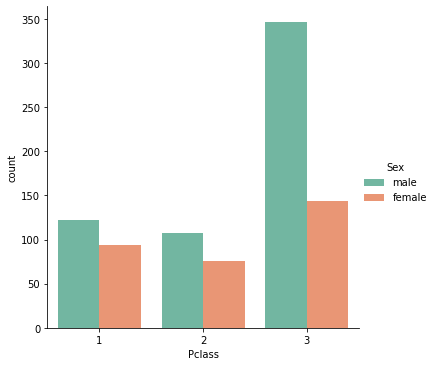

In [10]:
sns.factorplot('Pclass',data= TITANIC_data,kind='count',hue='Sex', palette="Set2")

In [8]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 13:
        return 'child'
    else:
        return sex

In [9]:
TITANIC_data['Person'] = TITANIC_data[['Age','Sex']].apply(male_female_child,axis = 1)

In [10]:
TITANIC_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,male
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,male
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,male
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,female
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,male


In [11]:
TITANIC_data.groupby(['Pclass','Person']).size()

Pclass  Person
1       child       4
        female     93
        male      119
2       child      17
        female     68
        male       99
3       child      48
        female    121
        male      322
dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


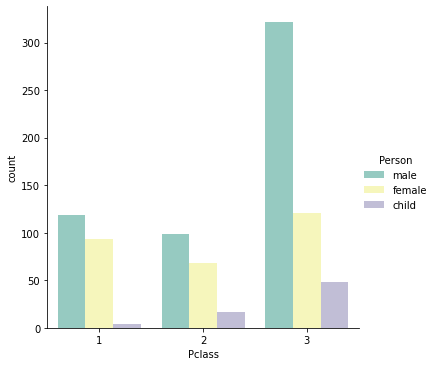

In [15]:
sns.factorplot('Pclass',data=TITANIC_data, kind='count',hue='Person', palette="Set3")

In [12]:
TITANIC_data['Age'].mean()

29.69911764705882

In [13]:
TITANIC_data['Person'].value_counts()

male      540
female    282
child      69
Name: Person, dtype: int64

### How age is distributed  to Sex


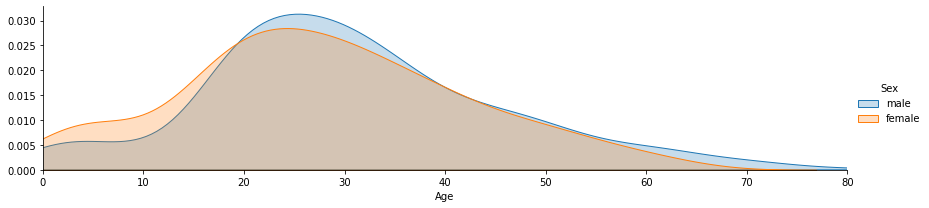

In [14]:
fig = sns.FacetGrid(TITANIC_data,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = TITANIC_data['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

### How age is distributed  to Person 

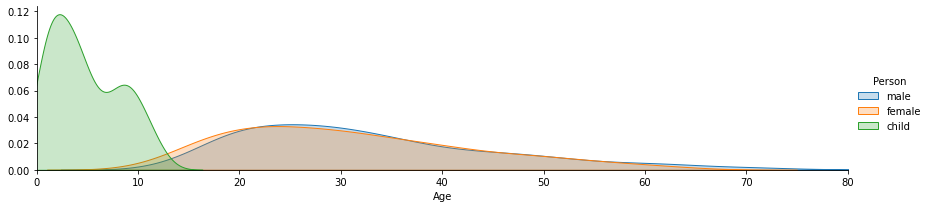

In [15]:
fig = sns.FacetGrid(TITANIC_data,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = TITANIC_data['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

### How age is distributed  to Pclass

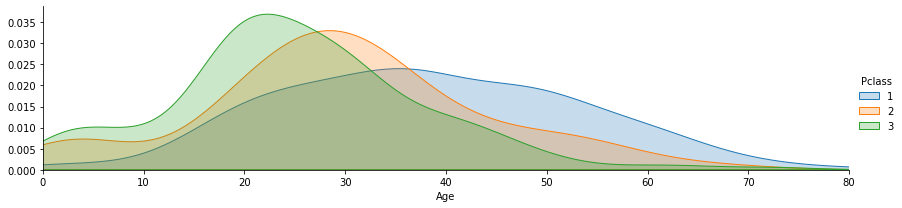

In [16]:
fig = sns.FacetGrid(TITANIC_data,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = TITANIC_data['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

### Useless TITANIC_data to drop

In [17]:
data_drop = ["PassengerId","Name","Ticket","Cabin","Embarked"] 
TITANIC_cleaned= TITANIC_data.drop(data_drop,axis = 1)

In [18]:
TITANIC_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Person
0,No,2,male,28.0,0,0,13.0000,male
1,No,3,male,25.0,0,0,7.6500,male
2,No,3,male,20.0,0,0,7.8542,male
3,No,3,female,29.0,0,4,21.0750,female
4,No,1,male,31.0,1,0,52.0000,male


In [19]:
TITANIC_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Person    891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [20]:
TITANIC_cleaned = TITANIC_cleaned.fillna(TITANIC_cleaned["Age"].mean())

In [21]:
TITANIC_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Person    891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [22]:
TITANIC_cleaned.loc[2]

Survived        No
Pclass           3
Sex           male
Age             20
SibSp            0
Parch            0
Fare        7.8542
Person        male
Name: 2, dtype: object

### Replace Survived target  YES NO with 0 1


In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
TITANIC_cleaned['Survived']=encoder.fit_transform(TITANIC_cleaned['Survived'])
TITANIC_cleaned.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Person
0,0,2,male,28.0,0,0,13.0000,male
1,0,3,male,25.0,0,0,7.6500,male
2,0,3,male,20.0,0,0,7.8542,male
3,0,3,female,29.0,0,4,21.0750,female
4,0,1,male,31.0,1,0,52.0000,male
5,0,3,male,37.0,2,0,7.9250,male
6,0,3,male,19.0,0,0,14.5000,male
7,1,3,female,1.0,0,2,15.7417,child
8,0,3,male,20.5,0,0,7.2500,male
9,1,2,female,42.0,1,0,26.0000,female


### Replace Sex target  male / female with 0 / 1

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
TITANIC_cleaned['Sex']=encoder.fit_transform(TITANIC_cleaned['Sex'])
TITANIC_cleaned.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Person
0,0,2,1,28.0,0,0,13.0000,male
1,0,3,1,25.0,0,0,7.6500,male
2,0,3,1,20.0,0,0,7.8542,male
3,0,3,0,29.0,0,4,21.0750,female
4,0,1,1,31.0,1,0,52.0000,male
5,0,3,1,37.0,2,0,7.9250,male
6,0,3,1,19.0,0,0,14.5000,male
7,1,3,0,1.0,0,2,15.7417,child
8,0,3,1,20.5,0,0,7.2500,male
9,1,2,0,42.0,1,0,26.0000,female


In [25]:
TITANIC_cleaned.loc[2]

Survived         0
Pclass           3
Sex              1
Age             20
SibSp            0
Parch            0
Fare        7.8542
Person        male
Name: 2, dtype: object

### Replace Person target  male / female /child  

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
TITANIC_cleaned['Person']=encoder.fit_transform(TITANIC_cleaned['Person'])
TITANIC_cleaned.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Person
0,0,2,1,28.0,0,0,13.0000,2
1,0,3,1,25.0,0,0,7.6500,2
2,0,3,1,20.0,0,0,7.8542,2
3,0,3,0,29.0,0,4,21.0750,1
4,0,1,1,31.0,1,0,52.0000,2
5,0,3,1,37.0,2,0,7.9250,2
6,0,3,1,19.0,0,0,14.5000,2
7,1,3,0,1.0,0,2,15.7417,0
8,0,3,1,20.5,0,0,7.2500,2
9,1,2,0,42.0,1,0,26.0000,1


## Divide_data

In [27]:
input_cols = ["Pclass","Sex","Age","SibSp","Parch","Fare","Person"]
output_cols = ["Survived"]

X = TITANIC_cleaned[input_cols]
Y = TITANIC_cleaned[output_cols]

print(X.shape,Y.shape)
print(type(X))

(891, 7) (891, 1)
<class 'pandas.core.frame.DataFrame'>


In [28]:
def entropy(col):
    counts = np.unique(col,return_counts = True) 
    N = float(col.shape[0])
    ent=0.0
    #print(counts)
    for ix in counts[1]:
        probability = ix/N
        ent += (-1.0*probability*np.log2(probability))
    return ent

In [29]:
#testing entropy function

arr = np.array([1,1,1,0,1,0,0,0])

entropy(arr) '

1.0

* Implementing Information Gain :
* divide_data function

In [30]:
# divide_data function
def divide_data(x_data,fkey,fval):
    x_right = pd.DataFrame([],columns = x_data.columns) #making an empty data frame ,having all the columns that are even available in the original data frame
    x_left = pd.DataFrame([],columns = x_data.columns)
    
    for ix in range(x_data.shape[0]): # running loop equal to the number of rows times
        val = x_data[fkey].loc[ix]
        
        if val>fval:
            x_right = x_right.append(x_data.loc[ix]) # append the entire row from the original dataframe
        else:
            x_left = x_left.append(x_data.loc[ix])
    return x_left,x_right

In [31]:
#testing of divide_data()
#x_left,x_right = divide_data(cleaned_data[:10],'Sex',0.5)
#print(x_left)
#print(x_right)

In [32]:
def information_gain(x_data,fkey,fval):
    left,right = divide_data(x_data,fkey,fval)
    
    #% of total samples are on left and right
    l = float(left.shape[0])/x_data.shape[0] # number of rows on left hand side
    r = float(right.shape[0])/x_data.shape[0] # number of rows on right hand side
    
    #If in case all rows come to one side only and the other side don't have any row
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -1000000  # representing Min information gain
       
    inf_gain = entropy(x_data.Survived) - (l*entropy(left.Survived) + r*entropy(right.Survived))
    return inf_gain

* test information_gain function 

In [33]:
for fx in X.columns:
    print(fx)
    print(information_gain(TITANIC_cleaned,fx,TITANIC_cleaned[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.001158644038169343
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464
Person
0.23699078947349095


#  creating decision tree

In [34]:
#  creating decision tree
class DecisionTree:
    #constructor
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
    def train(self,X_train):
        features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Person']
        info_gains = []
        
        for ix in features:
            ig = information_gain(X_train,ix,X_train[ix].mean()) #ig is the information gain for that particular 'ix'th feature/column of the data
            info_gains.append(ig)
        
        self.fkey = features[np.argmax(info_gains)] #np.argmax(info_gains) -> return the index value whose value of the information gain will be maximum,then we will get that index fromt the feature array and store it in variable feature
        self.fval = X_train[self.fkey].mean()
        print("Making Tree Features is",self.fkey)
        
        # Now we just need to SPLIT the DATA
        data_left,data_right = divide_data(X_train,self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)#reset_index(drop=True) drops the current index of the DataFrame and replaces it with an index of increasing integers. It never drops columns. 
        # Base Case 1:Truely a leaf node
        if data_left.shape[0] == 0 or data_right.shape[0] == 0: # ie if either there are no rows in the left subtree or no rows in the right subtree then terminate the tree if()
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return 
        
        # Base Case 2:Stop early when depth >= max depth
        if(self.depth >= self.max_depth):
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return
        
        # Recursive Case
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        # setting the target at every node,ie we are deciding at eveery node whether the passengers survived or not instead of just calculating over the leaf nodes
        if X_train.Survived.mean() >= 0.5:
            self.target = "Survived"
        else:
            self.target = "Dead"
        return
    
    def predict(self,test):
        if test[self.fkey]>self.fval:
            #go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [35]:
# testing decision tree Class algorithm
d = DecisionTree() # making an object of the class DecsionTree
d.train(TITANIC_cleaned) #calling the train() function of the DecisionTree class and passing the cleaned_data that we preprocessed earlier as the argument of the function to build the tree 

#the feature can repeat as they are getting repeated in different branches

Making Tree Features is Person
Making Tree Features is Pclass
Making Tree Features is Pclass
Making Tree Features is Person
Making Tree Features is Sex
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Person
Making Tree Features is Sex
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Sex
Making Tree Features is Person
Making Tree Features is Parch
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Person
Making Tree Features is Parch
Making Tree Features is Parch
Making Tree Features is Sex
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Parch
M

In [36]:
#making 2 sets ,1.for training ,2.testing
split = int(0.7 * TITANIC_cleaned.shape[0]) #0.7 signifies 70% of data 
train_data = TITANIC_cleaned[:split]
test_data = TITANIC_cleaned[split:]
test_data = test_data.reset_index(drop = True)

In [37]:
print(train_data.shape,test_data.shape)

(623, 8) (268, 8)


In [38]:
# training out decision tree model
dt = DecisionTree() # making object of the class Decision Tree

In [39]:
dt.train(train_data)

Making Tree Features is Person
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Pclass
Making Tree Features is Sex
Making Tree Features is Age
Making Tree Features is Sex
Making Tree Features is SibSp
Making Tree Features is Age
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is SibSp
Making Tree Features is Person
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Sex
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Sex
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Fea

In [40]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)

Person
1.5345104333868378
Pclass
Fare


In [41]:
# generating predictions for our test data
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [42]:
y_pred

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Survived',
 'Dead',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Survived',
 'Dead',
 'Survived',
 'Survived',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 '

In [43]:
y_actual = test_data[output_cols]

In [44]:
print(y_actual)

     Survived
0           0
1           1
2           0
3           0
4           0
..        ...
263         1
264         0
265         0
266         0
267         1

[268 rows x 1 columns]


In [45]:
le = LabelEncoder()
y_pred = le.fit_transform(y_pred)

In [46]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0
 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1
 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0
 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1
 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 1 0 1 0 1]


In [47]:
#print(y_pred.shape)
y_pred = np.array(y_pred).reshape((-1,1)) # -1 signifies no change should be made in rows, and 1 signifies that number of columns shoul be 1

#now shape of y_pred and y_actual will be same
print(y_pred.shape)

print(y_actual.shape)

(268, 1)
(268, 1)


In [48]:
#acc = np.sum(y_pred == y_actual)/y_pred.shape[0]
acc = np.sum(np.array(y_pred) == np.array(y_actual))/y_pred.shape[0]

In [49]:
print(acc)

0.7835820895522388


## Decision Tree Using Sklearn

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
sk_tree = DecisionTreeClassifier

In [52]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [53]:
#training decision tree
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [54]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1])

In [55]:
sk_tree.score(test_data[input_cols],test_data[output_cols])

0.7873134328358209

## Visualizing a Decision Tree

In [56]:
from six import StringIO
import six
import sys
sys.modules['sklearn.externals.six'] = six
import numpy as np
import pandas as pd

In [63]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [66]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [67]:
dot_data = StringIO() #creating an object of the class StringIO
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)

In [68]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# PLOTING THE DECISION TREE NOT WORKING §§§§§§ :(

In [69]:
X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1,))
X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1,))

#checking for overfitting
#training model withou specifying the maximum depth
#sk_tree = DecisionTreeClassifier(criterion = 'entropy') # here we are training the model , without specifyinf the maximum depth of the tree,to check whether it result in overfitting or not

In [71]:
# 1 way to prevent overfitting : ie training the model by specifying the maximum depth
# in this way we need to find out the hyper parameter ie max_depth parameter
sk_tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5)

In [72]:
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train) # accuracy of training data

0.8539325842696629

In [73]:
sk_tree.score(X_test,Y_test)

0.7873134328358209

# Now lets see the second way Random forest ie learning over multiple such trees to predict the results

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
# rf = RandomForestClassifier?

In [76]:
rf = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',max_depth=5)

In [77]:
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)

In [78]:
# now checking the accuracy of training set over random-Forest Model
rf.score(X_train,Y_train)

0.8651685393258427

In [79]:
# now checking the accuracy of test set over random-Forest Model,and then comparing it with the accuracy of that of the training set
rf.score(X_test,Y_test)

0.8097014925373134

* The accuracy of the training and the test are still far from each other, which means that we have not achieved a good generalisation, so we continue with the exercise :(

## Cross Validation

In [81]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(RandomForestClassifier(n_estimators=34,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()

In [82]:
print(acc)

0.833083870967742


* we're going to determine the effect of the number of trees in the random forest on the accuracy and record all the accuracies in the accuracy list.


In [83]:
acc_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5),X_train,Y_train,cv=5).mean()
    acc_list.append(acc)

In [84]:
print(acc_list)



[0.8010064516129033, 0.8074193548387096, 0.8058451612903225, 0.8234967741935485, 0.8234580645161291, 0.8315354838709677, 0.8235096774193549, 0.8315096774193549, 0.8299096774193548, 0.8363483870967743, 0.8395612903225806, 0.8314967741935483, 0.8266967741935483, 0.8379096774193548, 0.8363096774193549, 0.8282967741935483, 0.8459612903225807, 0.8315354838709677, 0.8299096774193548, 0.8315354838709677, 0.8331096774193549, 0.8315225806451613, 0.8347225806451612, 0.8331096774193549, 0.8282967741935483, 0.8331096774193549, 0.8299096774193548, 0.8362967741935485, 0.8315354838709677, 0.8331096774193549, 0.8379483870967741, 0.8250709677419354, 0.8314967741935485, 0.8298838709677419, 0.8331096774193549, 0.8363096774193549, 0.8315225806451613, 0.8379096774193548, 0.8315096774193549, 0.8299354838709677, 0.8347225806451612, 0.8315096774193549, 0.8266838709677419, 0.8331096774193549, 0.8411483870967741, 0.8379225806451613, 0.8299096774193548, 0.8347225806451612, 0.8266580645161291]


* we can see from the list that 0.83  is sort of the maximum accuracy that can be achieved

## Plotting acc_list on graph 

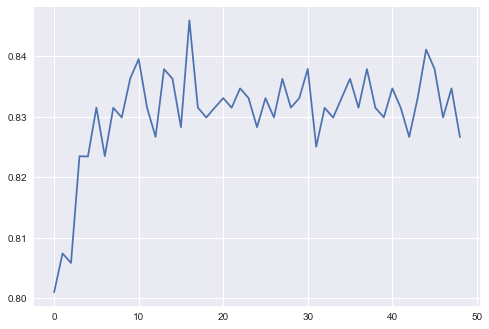

In [85]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(acc_list)

In [92]:
print(np.argmax(acc_list)) 


16


### From the graph and the search for the maximum argument, we can observe that the maximum precision can be reached around 16, but since the indxation of the graph starts from 0, but we started from 1 so we will take 16+1=17 trees
## Now let's check and train our RandomForest on 16+1=17 trees and see how accurate it is on the test data.

In [87]:
rf = RandomForestClassifier(n_estimators=17,max_depth=5,criterion='entropy')
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=17)

In [88]:
rf.score(X_train,Y_train)

0.8507223113964687

In [89]:
rf.score(X_test,Y_test)

0.7947761194029851